In [18]:
import pandas as pd
import numpy as np
import os
import glob

import matplotlib.pyplot as plt
# plt.rcParams['figure.figsize'] = (15, 5)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [19]:
from helpers import *

# Data prep

Läs in fil

In [20]:
df = pd.read_csv('../indata/ODB_TSV/ODB-utbildningsnivå, ålder, tid och kön 2015-2017.txt', sep='\t', header=1)

Specificera indexering

In [21]:
df = df.set_index(['område', 'utbildningsnivå'])

Vänd ner samtliga kolumner i en kolumn

In [22]:
df = pd.DataFrame(df.stack())

Lyft ut index till kolumner igen

In [23]:
df = df.reset_index()

Sätt beskrivande kolumnnamn

In [24]:
df = df.rename(columns={'level_2': 'ageyeargender', 0: 'value'})

Splitta områdesnamn till endast baskod

In [25]:
df['område'] = df['område'].str.split(' ', 1, expand = True)
df = df.rename(columns={'område': 'BASKOD2010'})
df['BASKOD2010'] = df['BASKOD2010'].astype(str).astype(int)

Splitta ut `ageyeargender` till fyra separata kolumner

In [26]:
df['agegroup'], df['kasta'], df['year'], df['gender'] = df['ageyeargender'].str.split(' ').str

Kasta kolumner som inte längre är relevanta

In [27]:
df = df.drop('kasta', 1)
df = df.drop('ageyeargender', 1)

Specificera ordningen på kolumnerna

In [28]:
df = df[['BASKOD2010','year','utbildningsnivå', 'gender', 'agegroup', 'value']]

In [29]:
# df.groupby(list(df.columns[:-1])).sum().reset_index()

Byt om `BASKOD2010` till entity-namnet

In [30]:
df = baskod2010tobasomrade(df)

In [31]:
df.head(10)

,year,utbildningsnivå,gender,agegroup,basomrade,value
0,2015,Eftergymnasial 3- år,Kvinnor,20-24,1010120_skeppsbron,0
1,2015,Eftergymnasial 3- år,Kvinnor,20-24,1010130_munkbron,4
2,2015,Eftergymnasial 3- år,Kvinnor,20-24,1010140_stortorget,12
3,2015,Eftergymnasial 3- år,Kvinnor,20-24,1010201_centralstationen_n,1
4,2015,Eftergymnasial 3- år,Kvinnor,20-24,1010220_klara_kyrka,0
5,2015,Eftergymnasial 3- år,Kvinnor,20-24,1010230_centralposten,2
6,2015,Eftergymnasial 3- år,Kvinnor,20-24,1010240_oscarsteatern,4
7,2015,Eftergymnasial 3- år,Kvinnor,20-24,1010250_brunkeberg,0
8,2015,Eftergymnasial 3- år,Kvinnor,20-24,1010290_oxtorget,3
9,2015,Eftergymnasial 3- år,Kvinnor,20-24,1010310_norrlandsgatan,2


Specificera indexering

In [32]:
df = df.set_index(['basomrade'])

Slå samman åldersgrupper till en `25-64` grupp.

In [16]:
df = df[df['agegroup'] != '20-24']

In [17]:
df = df.groupby(['basomrade', 'year', 'utbildningsnivå', 'gender']).sum().reset_index()

Byt namn på `gender` kolumnen för att följa konventionen i övriga notebooks.

In [18]:
df = df.rename(columns={'gender':'Kön'})

Sätt `Kön` till en pandas category

In [19]:
df['Kön'] = df['Kön'].astype('category')
df['Kön'].cat.categories = ['female', 'male']

# Befolkning 25-64

Beräkna summan av antalet för varje basområde

In [20]:
popgender = df.groupby(['basomrade', 'year', 'Kön']).sum().reset_index()
total = df.groupby(['basomrade', 'year']).sum().reset_index()

Exportera

In [21]:
concept = 'population_aged_25_64'

In [22]:
total = appendNewDatapoints(concept, total)
female, male = byGender(concept, popgender)

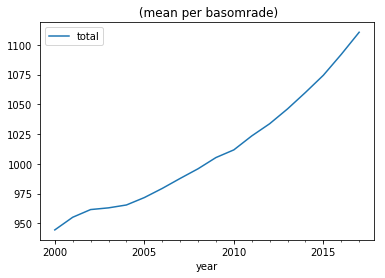

In [23]:
plotcombined(total, 'total')

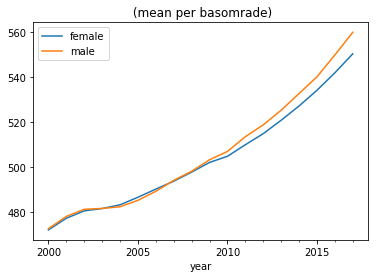

In [24]:
plotcombined(female, 'female')
plotcombined(male, 'male')